# Fourt Exercise session

In [130]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [1]:
import pandas as pd
import numpy as np

## Missing Data

We create a random dataframe sampling froma a normal distribution, giving some names to the idexes and to the columns.

In [22]:
df = pd.DataFrame(
                  np.random.randn(5, 3),               #rows, columns
                  index = ['a', 'c', 'e', 'f', 'h'],
                  columns=['one', 'two', 'three'],
)
df

,one,two,three
a,0.277717,0.828014,0.443467
c,0.170166,-0.299087,-1.143562
e,-1.835877,1.356093,2.118838
f,0.169749,0.552307,-0.280131
h,0.194157,-1.051152,-0.851457


We then add a column with a standard value.



In [23]:
df['four'] = 'std'
df

,one,two,three,four
a,0.277717,0.828014,0.443467,std
c,0.170166,-0.299087,-1.143562,std
e,-1.835877,1.356093,2.118838,std
f,0.169749,0.552307,-0.280131,std
h,0.194157,-1.051152,-0.851457,std


We want to add a column that has a dependency: *is equal to 1 if the value on the column 'one' is greater than 0*

In [24]:
df['five'] = df['one']>0
df

,one,two,three,four,five
a,0.277717,0.828014,0.443467,std,True
c,0.170166,-0.299087,-1.143562,std,True
e,-1.835877,1.356093,2.118838,std,False
f,0.169749,0.552307,-0.280131,std,True
h,0.194157,-1.051152,-0.851457,std,True


Let's introduce some null values in the tuples

In [26]:
df2 = df.reindex(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h'])
df2

,one,two,three,four,five
a,0.277717,0.828014,0.443467,std,True
b,NaN,NaN,NaN,NaN,NaN
c,0.170166,-0.299087,-1.143562,std,True
d,NaN,NaN,NaN,NaN,NaN
e,-1.835877,1.356093,2.118838,std,False
f,0.169749,0.552307,-0.280131,std,True
g,NaN,NaN,NaN,NaN,NaN
h,0.194157,-1.051152,-0.851457,std,True


In [27]:
df2.isnull()

,one,two,three,four,five
a,False,False,False,False,False
b,True,True,True,True,True
c,False,False,False,False,False
d,True,True,True,True,True
e,False,False,False,False,False
f,False,False,False,False,False
g,True,True,True,True,True
h,False,False,False,False,False


In [29]:
df2.isna() # is equivalent to .isnull()

,one,two,three,four,five
a,False,False,False,False,False
b,True,True,True,True,True
c,False,False,False,False,False
d,True,True,True,True,True
e,False,False,False,False,False
f,False,False,False,False,False
g,True,True,True,True,True
h,False,False,False,False,False


### Series

We can create a series of data

In [31]:
df3 = pd.Series([1,2,3])
df3

0    1
1    2
2    3
dtype: int64

and assign a null value to the first row

In [34]:
df3.loc[0] = None 
df3

0    NaN
1    2.0
2    3.0
dtype: float64

In [35]:
df3.isna()

0     True
1    False
2    False
dtype: bool

In [39]:
df4 = pd.Series(['a', 'b', 'c'])
df4

0    a
1    b
2    c
dtype: object

In [40]:
df4.loc[0] = None
df4.loc[1] = np.NaN
df4

0    None
1     NaN
2       c
dtype: object

Notice that when you have strings, i.e. it is a series of objects, the None is not converted into NaN, but remains None, but anyway is considered a null value as we can see as follows:

In [41]:
df4.isna()

0     True
1     True
2    False
dtype: bool

In [56]:
data = pd.read_csv('./Dataset/property.csv')
data

,ID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000,104.0,PUTNAM,Y,3,1,1000
1,100002000,197.0,LEXINGTON,N,3,1.5,--
2,100003000,NaN,LEXINGTON,N,NaN,1,850
3,100004000,201.0,BERKELEY,12,1,NaN,700
4,100005000,203.0,BERKELEY,Y,3,2,1600
5,100006000,207.0,BERKELEY,Y,NaN,1,800
6,100007000,NaN,WASHINGTON,NaN,2,HURLEY,950
7,100008000,213.0,TREMONT,Y,1,1,NaN
8,100009000,215.0,TREMONT,Y,na,2,1800
9,100010000,216.0,BERELEY,Y,1,3,10


In [58]:
data.isnull()

,ID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,True,False,False,True,False,False
3,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False
5,False,False,False,False,True,False,False
6,False,True,False,True,False,False,False
7,False,False,False,False,False,False,True
8,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False


In this dataset we can notice that there are points which are not None, nor NaN, but has *na* or *--* as standard values to indicate missing values, and as such **are not recognized as missing values**. We can adjust this as follow:

In [59]:
missing = ['na', '--']
data = pd.read_csv('./Dataset/property.csv', na_values=missing)
data

,ID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000,104.0,PUTNAM,Y,3.0,1,1000.0
1,100002000,197.0,LEXINGTON,N,3.0,1.5,NaN
2,100003000,NaN,LEXINGTON,N,NaN,1,850.0
3,100004000,201.0,BERKELEY,12,1.0,NaN,700.0
4,100005000,203.0,BERKELEY,Y,3.0,2,1600.0
5,100006000,207.0,BERKELEY,Y,NaN,1,800.0
6,100007000,NaN,WASHINGTON,NaN,2.0,HURLEY,950.0
7,100008000,213.0,TREMONT,Y,1.0,1,NaN
8,100009000,215.0,TREMONT,Y,NaN,2,1800.0
9,100010000,216.0,BERELEY,Y,1.0,3,10.0


In [60]:
data.isnull()

,ID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,True
2,False,True,False,False,True,False,False
3,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False
5,False,False,False,False,True,False,False
6,False,True,False,True,False,False,False
7,False,False,False,False,False,False,True
8,False,False,False,False,True,False,False
9,False,False,False,False,False,False,False


## Imputation of Null values: fill

During this opertion we are approximating, so we are introducng some accuracy errors, some bias. But if the null values are not so many this operations are accepted.

Let's substitute null values for the column 'ST_NUM'

In [64]:
data['ST_NUM'].fillna('missing', inplace=True) # inplace=True make the command modify the dataset
data

,ID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000,104.0,PUTNAM,Y,3.0,1,1000.0
1,100002000,197.0,LEXINGTON,N,3.0,1.5,NaN
2,100003000,missing,LEXINGTON,N,NaN,1,850.0
3,100004000,201.0,BERKELEY,12,1.0,NaN,700.0
4,100005000,203.0,BERKELEY,Y,3.0,2,1600.0
5,100006000,207.0,BERKELEY,Y,NaN,1,800.0
6,100007000,missing,WASHINGTON,NaN,2.0,HURLEY,950.0
7,100008000,213.0,TREMONT,Y,1.0,1,NaN
8,100009000,215.0,TREMONT,Y,NaN,2,1800.0
9,100010000,216.0,BERELEY,Y,1.0,3,10.0


We can use fillna to fill the missing with the value in the row above or below by specifing the right method.

In [65]:
data['NUM_BEDROOMS'].fillna(method='ffill')

0     3.0
1     3.0
2     3.0
3     1.0
4     3.0
5     3.0
6     2.0
7     1.0
8     1.0
9     1.0
10    2.0
11    1.0
Name: NUM_BEDROOMS, dtype: float64

In [66]:
data2 = pd.read_csv('./Dataset/TechUSA.csv')
data2

,permalink,company,numEmps,category,city,state,fundedDate,raisedAmt,raisedCurrency,round
0,lifelock,LifeLock,NaN,web,Tempe,AZ,1-May-07,6850000,USD,b
1,lifelock,LifeLock,NaN,web,Tempe,AZ,1-Oct-06,6000000,USD,a
2,lifelock,LifeLock,NaN,web,Tempe,AZ,1-Jan-08,25000000,USD,c
3,mycityfaces,MyCityFaces,7.0,web,Scottsdale,AZ,1-Jan-08,50000,USD,seed
4,flypaper,Flypaper,NaN,web,Phoenix,AZ,1-Feb-08,3000000,USD,a
...,...,...,...,...,...,...,...,...,...,...
1455,trusera,Trusera,15.0,web,Seattle,WA,1-Jun-07,2000000,USD,angel
1456,alerts-com,Alerts.com,NaN,web,Bellevue,WA,8-Jul-08,1200000,USD,a
1457,myrio,Myrio,75.0,software,Bothell,WA,1-Jan-01,20500000,USD,unattributed
1458,grid-networks,Grid Networks,NaN,web,Seattle,WA,30-Oct-07,9500000,USD,a


In [70]:
data2['numEmps'].fillna(method='ffill')

0        NaN
1        NaN
2        NaN
3        7.0
4        7.0
        ... 
1455    15.0
1456    15.0
1457    75.0
1458    75.0
1459    75.0
Name: numEmps, Length: 1460, dtype: float64

In [71]:
data2['numEmps'].fillna(method='ffill').fillna(method='bfill')

0        7.0
1        7.0
2        7.0
3        7.0
4        7.0
        ... 
1455    15.0
1456    15.0
1457    75.0
1458    75.0
1459    75.0
Name: numEmps, Length: 1460, dtype: float64

The method fillna has a property called limit that allow you to limit the number of how many cells can be affected to this operation

In [72]:
data2['numEmps'].fillna(method='ffill', limit=1)

0        NaN
1        NaN
2        NaN
3        7.0
4        7.0
        ... 
1455    15.0
1456    15.0
1457    75.0
1458    75.0
1459     NaN
Name: numEmps, Length: 1460, dtype: float64

Equivalently we can use the commands

In [75]:
data2['numEmps'].ffill(limit=1)

0        NaN
1        NaN
2        NaN
3        7.0
4        7.0
        ... 
1455    15.0
1456    15.0
1457    75.0
1458    75.0
1459     NaN
Name: numEmps, Length: 1460, dtype: float64

In [74]:
data2['numEmps'].bfill()

0         7.0
1         7.0
2         7.0
3         7.0
4       105.0
        ...  
1455     15.0
1456     75.0
1457     75.0
1458      NaN
1459      NaN
Name: numEmps, Length: 1460, dtype: float64

And can be also applied to all the table 

In [76]:
data2.ffill()

,permalink,company,numEmps,category,city,state,fundedDate,raisedAmt,raisedCurrency,round
0,lifelock,LifeLock,NaN,web,Tempe,AZ,1-May-07,6850000,USD,b
1,lifelock,LifeLock,NaN,web,Tempe,AZ,1-Oct-06,6000000,USD,a
2,lifelock,LifeLock,NaN,web,Tempe,AZ,1-Jan-08,25000000,USD,c
3,mycityfaces,MyCityFaces,7.0,web,Scottsdale,AZ,1-Jan-08,50000,USD,seed
4,flypaper,Flypaper,7.0,web,Phoenix,AZ,1-Feb-08,3000000,USD,a
...,...,...,...,...,...,...,...,...,...,...
1455,trusera,Trusera,15.0,web,Seattle,WA,1-Jun-07,2000000,USD,angel
1456,alerts-com,Alerts.com,15.0,web,Bellevue,WA,8-Jul-08,1200000,USD,a
1457,myrio,Myrio,75.0,software,Bothell,WA,1-Jan-01,20500000,USD,unattributed
1458,grid-networks,Grid Networks,75.0,web,Seattle,WA,30-Oct-07,9500000,USD,a


We may want to substitute the null values with some math characteristic such as the average

In [78]:
data2['numEmps'].fillna(data2['numEmps'].mean(), inplace=True)
data2

,permalink,company,numEmps,category,city,state,fundedDate,raisedAmt,raisedCurrency,round
0,lifelock,LifeLock,95.72134,web,Tempe,AZ,1-May-07,6850000,USD,b
1,lifelock,LifeLock,95.72134,web,Tempe,AZ,1-Oct-06,6000000,USD,a
2,lifelock,LifeLock,95.72134,web,Tempe,AZ,1-Jan-08,25000000,USD,c
3,mycityfaces,MyCityFaces,7.00000,web,Scottsdale,AZ,1-Jan-08,50000,USD,seed
4,flypaper,Flypaper,95.72134,web,Phoenix,AZ,1-Feb-08,3000000,USD,a
...,...,...,...,...,...,...,...,...,...,...
1455,trusera,Trusera,15.00000,web,Seattle,WA,1-Jun-07,2000000,USD,angel
1456,alerts-com,Alerts.com,95.72134,web,Bellevue,WA,8-Jul-08,1200000,USD,a
1457,myrio,Myrio,75.00000,software,Bothell,WA,1-Jan-01,20500000,USD,unattributed
1458,grid-networks,Grid Networks,95.72134,web,Seattle,WA,30-Oct-07,9500000,USD,a


Otherwise, if we want to act over all the table we can use 

In [79]:
data2.fillna(data.mean(), inplace=True)
data2

,permalink,company,numEmps,category,city,state,fundedDate,raisedAmt,raisedCurrency,round
0,lifelock,LifeLock,95.72134,web,Tempe,AZ,1-May-07,6850000,USD,b
1,lifelock,LifeLock,95.72134,web,Tempe,AZ,1-Oct-06,6000000,USD,a
2,lifelock,LifeLock,95.72134,web,Tempe,AZ,1-Jan-08,25000000,USD,c
3,mycityfaces,MyCityFaces,7.00000,web,Scottsdale,AZ,1-Jan-08,50000,USD,seed
4,flypaper,Flypaper,95.72134,web,Phoenix,AZ,1-Feb-08,3000000,USD,a
...,...,...,...,...,...,...,...,...,...,...
1455,trusera,Trusera,15.00000,web,Seattle,WA,1-Jun-07,2000000,USD,angel
1456,alerts-com,Alerts.com,95.72134,web,Bellevue,WA,8-Jul-08,1200000,USD,a
1457,myrio,Myrio,75.00000,software,Bothell,WA,1-Jan-01,20500000,USD,unattributed
1458,grid-networks,Grid Networks,95.72134,web,Seattle,WA,30-Oct-07,9500000,USD,a


that compute the average over each single column and it uses to fill null values. 

ATTENTION: this command is applied only on column that contains number, so it is not able to perform the substitution for columns containing strings.

BEWARE: the type of the field is inferred. Hence if we apply this command and there is a null value for the id then it will substitute it with the id mean which does not make any sense, since in reality the id is not a number. So it **is better to apply the fill command column by column only to those we know it should be applied**.

Instead of the mean we can imputing the null values with other column characteristic. For instance, the median.

### Imputing Nulls: drop tuples

The alternative to substitution we can drop the tuples that contain at least a null value.

In [80]:
data2.dropna(axis=0)

,permalink,company,numEmps,category,city,state,fundedDate,raisedAmt,raisedCurrency,round
0,lifelock,LifeLock,95.72134,web,Tempe,AZ,1-May-07,6850000,USD,b
1,lifelock,LifeLock,95.72134,web,Tempe,AZ,1-Oct-06,6000000,USD,a
2,lifelock,LifeLock,95.72134,web,Tempe,AZ,1-Jan-08,25000000,USD,c
3,mycityfaces,MyCityFaces,7.00000,web,Scottsdale,AZ,1-Jan-08,50000,USD,seed
4,flypaper,Flypaper,95.72134,web,Phoenix,AZ,1-Feb-08,3000000,USD,a
...,...,...,...,...,...,...,...,...,...,...
1455,trusera,Trusera,15.00000,web,Seattle,WA,1-Jun-07,2000000,USD,angel
1456,alerts-com,Alerts.com,95.72134,web,Bellevue,WA,8-Jul-08,1200000,USD,a
1457,myrio,Myrio,75.00000,software,Bothell,WA,1-Jan-01,20500000,USD,unattributed
1458,grid-networks,Grid Networks,95.72134,web,Seattle,WA,30-Oct-07,9500000,USD,a


In [81]:
data2.dropna(axis='columns')

,permalink,company,numEmps,state,fundedDate,raisedAmt,raisedCurrency,round
0,lifelock,LifeLock,95.72134,AZ,1-May-07,6850000,USD,b
1,lifelock,LifeLock,95.72134,AZ,1-Oct-06,6000000,USD,a
2,lifelock,LifeLock,95.72134,AZ,1-Jan-08,25000000,USD,c
3,mycityfaces,MyCityFaces,7.00000,AZ,1-Jan-08,50000,USD,seed
4,flypaper,Flypaper,95.72134,AZ,1-Feb-08,3000000,USD,a
...,...,...,...,...,...,...,...,...
1455,trusera,Trusera,15.00000,WA,1-Jun-07,2000000,USD,angel
1456,alerts-com,Alerts.com,95.72134,WA,8-Jul-08,1200000,USD,a
1457,myrio,Myrio,75.00000,WA,1-Jan-01,20500000,USD,unattributed
1458,grid-networks,Grid Networks,95.72134,WA,30-Oct-07,9500000,USD,a


In [82]:
data = pd.read_csv('./Dataset/property.csv')
data

,ID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000,104.0,PUTNAM,Y,3,1,1000
1,100002000,197.0,LEXINGTON,N,3,1.5,--
2,100003000,NaN,LEXINGTON,N,NaN,1,850
3,100004000,201.0,BERKELEY,12,1,NaN,700
4,100005000,203.0,BERKELEY,Y,3,2,1600
5,100006000,207.0,BERKELEY,Y,NaN,1,800
6,100007000,NaN,WASHINGTON,NaN,2,HURLEY,950
7,100008000,213.0,TREMONT,Y,1,1,NaN
8,100009000,215.0,TREMONT,Y,na,2,1800
9,100010000,216.0,BERELEY,Y,1,3,10


We can even decide to drop tuples with at least a certain number of NON-null values.

In [92]:
data.dropna(thresh=len(data.columns)-1) 

,ID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000,104.0,PUTNAM,Y,3,1,1000
1,100002000,197.0,LEXINGTON,N,3,1.5,--
3,100004000,201.0,BERKELEY,12,1,NaN,700
4,100005000,203.0,BERKELEY,Y,3,2,1600
5,100006000,207.0,BERKELEY,Y,NaN,1,800
7,100008000,213.0,TREMONT,Y,1,1,NaN
8,100009000,215.0,TREMONT,Y,na,2,1800
9,100010000,216.0,BERELEY,Y,1,3,10
10,100011000,10.0,LEINGTON,N,2,1,800
11,100012000,213.0,TREMONT,Y,1,1,NaN


If we want to focus on some columns specifically, we can tell to look only in those columns. It will look for null values in those column and then if it finds one it remove the corresponding tuple.

In [93]:
data.dropna(subset=['ID', 'ST_NUM'])

,ID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000,104.0,PUTNAM,Y,3,1,1000
1,100002000,197.0,LEXINGTON,N,3,1.5,--
3,100004000,201.0,BERKELEY,12,1,NaN,700
4,100005000,203.0,BERKELEY,Y,3,2,1600
5,100006000,207.0,BERKELEY,Y,NaN,1,800
7,100008000,213.0,TREMONT,Y,1,1,NaN
8,100009000,215.0,TREMONT,Y,na,2,1800
9,100010000,216.0,BERELEY,Y,1,3,10
10,100011000,10.0,LEINGTON,N,2,1,800
11,100012000,213.0,TREMONT,Y,1,1,NaN


## Time Series

In [95]:
ts = pd.read_csv('./Dataset/shampoo.csv')
ts

,Month,Sales
0,1-01,266.0
1,1-02,145.9
2,1-03,183.1
3,1-04,NaN
4,1-05,180.3
5,1-06,168.5
6,1-07,231.8
7,1-08,224.5
8,1-09,192.8
9,1-10,NaN


Then we count the non-null values:

In [97]:
ts['Sales'].count()

30

and the null values:

In [98]:
len(ts['Sales']) - ts['Sales'].count()

6

<AxesSubplot:>

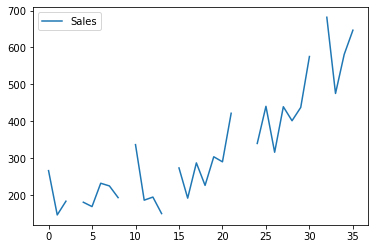

In [96]:
ts.plot()

We can see that the missing values causes a hole in the graph.

To have a link between two points we can use **interpolation**.

<AxesSubplot:>

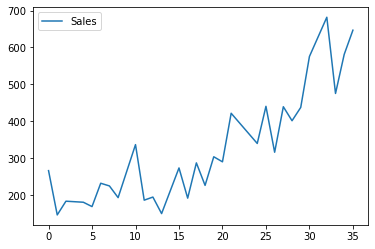

In [100]:
ts.interpolate(inplace=True) # the default method is linear interpolation
ts.plot()

The interpolation is useful when you have some holes but not too much, so that with linear interpolation we obtain an acceptable value.

We can build a dataframe in this way to make it understand we have an indexing that are dates:

In [133]:
index = [pd.Timestamp('2000-12-31'), pd.Timestamp('2001-04-10'), pd.Timestamp('2002-12-31'), pd.Timestamp('2003-07-25'), pd.Timestamp('2004-08-22'), pd.Timestamp('2005-02-15')]
values = [0.25, np.NaN, 4, 12.2, np.NaN, 14.4]

df = pd.DataFrame(values, index=index)
df

,0
2000-12-31,0.25
2001-04-10,NaN
2002-12-31,4.00
2003-07-25,12.20
2004-08-22,NaN
2005-02-15,14.40


,0
2000-12-31,0.250
2001-04-10,2.125
2002-12-31,4.000
2003-07-25,12.200
2004-08-22,13.300
2005-02-15,14.400


<AxesSubplot:>

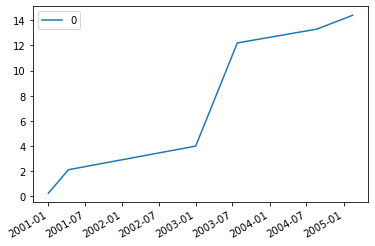

In [136]:
df.interpolate(method='linear')
df.interpolate(method='linear').plot()

With method linear the system consider only the values and do the interpolation without thinking about the time but if you have times as indexes you can ask the system to consider time, i.e. the fact that some data points are closer/further to the other 

,0
2000-12-31,0.250000
2001-04-10,0.763699
2002-12-31,4.000000
2003-07-25,12.200000
2004-08-22,13.718039
2005-02-15,14.400000


<AxesSubplot:>

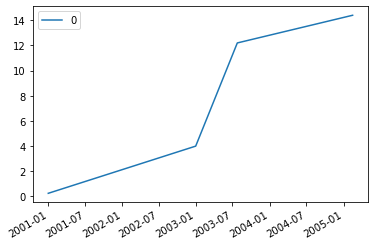

In [137]:
df.interpolate(method='time')
df.interpolate(method='time').plot()

## Outlier Detection

Most of the method we saw assume that the data is distributed according a normal distribution.

In [145]:
SEED = 42
np.random.seed(SEED)

data = 5 * np.random.randn(10000) + 50
print('Mean: ', np.mean(data))
print('Std:  ', np.std(data))

Mean:  49.98932008315787
Std:   5.017061030649938


The mean and std are more or less the one we specified with the expression (std * rnd + mean).

Usually the approach of data scientists with normal distribution is to consider the outlier the every point with a distance greater than 3 times the standard deviation of the data.

In [149]:
mean = np.mean(data)
std = np.std(data)

In [150]:
cut_off = std * 3
lower_th, upper_th = cut_off, mean + cut_off

All the values inside this interval are accepted and all the other are considered outliers.

In [157]:
outliers = [x for x in data if x < lower_th or x > upper_th]
len(outliers)

15

If we want to remove the outliers we can do as follows

In [159]:
data_no_out = [x for x in data if x > lower_th and x < upper_th]
len(data_no_out) + len(outliers) - len(data)

0

### Local Outlier Factor

In [162]:
from sklearn.neighbors import LocalOutlierFactor

In [163]:
X = [[-1.1], [0.2], [101.1], [0.3], [5.5], [10], [1000]]

out = LocalOutlierFactor(n_neighbors=2)
out.fit_predict(X)

array([ 1,  1, -1,  1, -1, -1, -1])

Where the -1 are the outliers and the 1 are the normal values.

Changing the number of neighbors we see how the outlier definition strictly depends on that value. Indeed you are specifing the number of neighboring point to consider for the distance computation.

In [188]:
out = LocalOutlierFactor(n_neighbors=1)
out.fit_predict(X)

array([-1,  1, -1,  1,  1,  1, -1])

In [187]:
out = LocalOutlierFactor(n_neighbors=3)
out.fit_predict(X)

array([ 1,  1, -1,  1,  1,  1, -1])